# Task01 DataWhale - 零基础对赛事的理解

## 1. 赛事的背景

 * 赛事数据来源： 赛题数据采用公开数据集 <a href="http://ufldl.stanford.edu/housenumbers/">SVHN</a>
 
 * 参赛的目的： 提升自己在CV方面的建模能力和实操，并掌握基础的计算机视觉分析方法，间接提升团队协作能力。
 
 * 思路解决途径: 与团队探讨赛事过程中遇到的问题，同时参考相应的paper作为思路参考（例如大佬推荐的：https://github.com/ChanChiChoi/awesome-ocr)
 
 * 基础知识学习外参考: 
 
 <a href="https://github.com/ShusenTang/Dive-into-DL-PyTorch" title="动手学深度学习+pytorch">1. 动手学深度学习+pytorch</a>
 
 <a href="https://github.com/ex2tron/OpenCV-Python-Tutorial" title="opencv基础教程">2. opencv基础教程</a>

## 2. 赛事规则理解及准备

### 2.1 赛事报名详情

 报名地址：https://tianchi.aliyun.com/competition/entrance/531795/introduction
 ![数据示例](Task01/报名地址.png)

 报名完成完成数据下载，保存到 `./DATA_SOURCE` 目录下.

### 2.2 赛事数据

|数据类别 | 数量大小 | 数据来源 |
| ---- | ---- | ---- |
|训练集 | 3W | 赛事给定数据 |
|验证集 | 1W | 赛事给定数据 |
|测试集 | 4W | SVHN原始数据集 |

- 数据特点：训练集、验证集提供了训练集、验证集中所有字符的位置框

- 注意事项：所有的参赛选手只能使用比赛给定的数据集完成训练，不能使用SVHN原始数据集进行训练。比赛结束后将会对Top选手进行代码审核，违规的选手将清除排行榜成绩

### 2.3 数据标签

| 原始图片 | 图例说明 | 图片JSON标识 |
| -- | -- | ---- |
| <img src="Task01/原始图片.png" alt="原始图片" width="300" height="250" align="center" /> | <img src="Task01/字符坐标.png" alt="字符坐标" width="250" height="250" align="center" /> | {<br>&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:#92278f;font-weight:bold;">"top"</span>:<span style="color:#25aae2;font-weight:bold;">[77, 8]</span>,<br>&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:#92278f;font-weight:bold;">"left"</span>:<span style="color:#25aae2;font-weight:bold;">[246, 323]</span>,<br>&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:#92278f;font-weight:bold;">"label"</span>:<span style="color:#25aae2;font-weight:bold;">[1, 9]</span>,<br>&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:#92278f;font-weight:bold;">"height"</span>:<span style="color:#25aae2;font-weight:bold;">[219, 219]</span>,<br>&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:#92278f;font-weight:bold;">"width"</span>:<span style="color:#25aae2;font-weight:bold;">[81, 96]</span><br>} |

(58, 128, 3)
(5, 2)


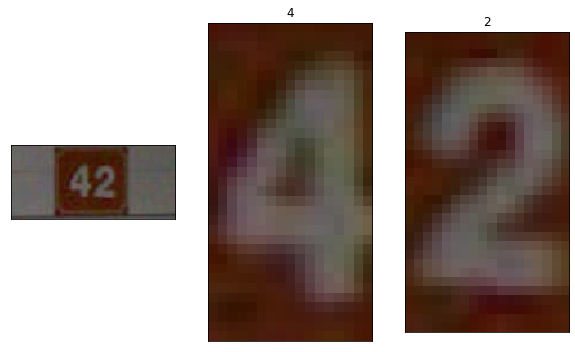

In [37]:
# 对数据集中的JSON标签文件进行读取
import json
import numpy as np
def parse_json(json_path):
    file = open(json_path, mode='r', encoding='utf-8')
    jsonDict = json.load(file)
    def get_name(name):
        d = jsonDict[name]
        arr = np.array([
            d['top'], d['height'], d['left'], d['width'], d['label']
        ])
        arr.astype(np.int)
        return arr
    return get_name
        

# 读取一张图 
# 以编号000012为例
import cv2
from PIL import Image
import matplotlib.pyplot as plt
# image = cv2.imread 不能有中文路径
img = cv2.imread('Task01/000012.png')
arr = parse_json('Task01/mchar_train.json')('000012.png')
print(img.shape)
plt.figure(figsize=(10, 10))
# 多展示一个维度
plt.subplot(1, arr.shape[1]+1, 1)
print(arr.shape)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
    # 从第二列开始
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0,idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    # 标识结果
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

### 2.4 评价指标

$$ Score = \frac{\text{Test_Predicate_Right}}{\text{Test_Predicate}} $$ 

其中：Test_Predicate_Right 表示测试预测正确的数量，Test_Predicate 表示进行预测集数量

### 2.5 解题思路

> **当前有三种解题方式**

1. 定长字符识别: （多标签分类问题）将问题转化为对每一张图像的定长字符识别。 首先对训练集中图片的最长字符数进行求解，结果显示最长字符数为6（求解过程如下代码所示），因此假设每张图片含6个字符，不足6个的位置补 $X$。这样每一张图像上的字符就有$[0,1,2,3,4,5,6,7,8,9,X]$ 这11个类别。

![23XXXX](Task01/23xxxxxx.png)

2. 不定长字符识别：采用特定的方法解决不定长字符识别问题，比如CRNN模型。(存疑，不太了解，后续再补充)

可以参考 https://blog.csdn.net/qq_24819773/article/details/104605994

In [12]:
# TODO

3. 检测再识别：（目标检测问题）直接将问题看作是一个10个类别的目标检测问题，参考YOLO或者SSD等常用检测模型进行解决。(存疑，不太了解，后续再补充)

可以参考 https://www.jianshu.com/p/cad68ca85e27 和 https://blog.csdn.net/zhangjunp3/article/details/80597312 

In [13]:
# TODO

## 4. 本节总结

- 掌握了参与该赛事的基本流程方法。
- 掌握了赛事的基本规则和数据结构。
- 对赛事题目有了更深刻的认识，三种解决思路的难度从低到高，也在下面的学习中逐步强化能力。